# Overview
The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable Notes

**pclass:** A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df_test_surivival = pd.read_csv('gender_submission.csv')
df_test["Survived"]= df_test_surivival["Survived"]
print(df_train.head())
print(df_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [2]:
# handle missing checking
print(f"train: \n{df_train.isna().sum()}")
print(f"test: \n{df_test.isna().sum()}")

train: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [3]:
# remove NA column of Embark
df_train = df_train.dropna(subset=['Embarked'])
# remove NA column of Fare
# df_test = df_test.dropna(subset=['Fare'])
print(f"train: \n{df_train.isna().sum()}")
print(f"test: \n{df_test.isna().sum()}")

train: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
test: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [4]:
# Set "unknown" for NA cabin
df_train["Cabin"][df_train['Cabin'].isna()]="Unknown"
df_test["Cabin"][df_test['Cabin'].isna()]="Unknown"
df_train.head()

C:\Users\Window10\AppData\Local\Temp\ipykernel_25036\4005619093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Cabin"][df_test['Cabin'].isna()]="Unknown"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [5]:
# train test split
Xcolumns = ['Sex','Age','Embarked', 'Fare','Pclass','SibSp','Parch']
X_train = df_train[Xcolumns].copy()
X_test = df_test[Xcolumns].copy()
Y_train = df_train[['Survived']].copy()
Y_test = df_test[['Survived']].copy()
print(X_train.shape,X_test.shape)

(889, 7) (418, 7)


In [6]:
# Label
from sklearn.preprocessing import LabelEncoder
sex_train = LabelEncoder().fit(X_train["Sex"])
sex_test = LabelEncoder().fit(X_test["Sex"])
embarked_train = LabelEncoder().fit(X_train["Embarked"])
embarked_test = LabelEncoder().fit(X_test["Embarked"])
print(sex_train.classes_)
print(embarked_train.classes_)

['female' 'male']
['C' 'Q' 'S']


In [7]:
# encoder
X_train["Sex"] = sex_train.transform(X_train["Sex"])
X_test["Sex"] = sex_test.transform(X_test["Sex"])
X_train["Embarked"] = embarked_train.transform(X_train["Embarked"])
X_test["Embarked"] = embarked_test.transform(X_test["Embarked"])
print(X_train)

     Sex   Age  Embarked     Fare  Pclass  SibSp  Parch
0      1  22.0         2   7.2500       3      1      0
1      0  38.0         0  71.2833       1      1      0
2      0  26.0         2   7.9250       3      0      0
3      0  35.0         2  53.1000       1      1      0
4      1  35.0         2   8.0500       3      0      0
..   ...   ...       ...      ...     ...    ...    ...
886    1  27.0         2  13.0000       2      0      0
887    0  19.0         2  30.0000       1      0      0
888    0   NaN         2  23.4500       3      1      2
889    1  26.0         0  30.0000       1      0      0
890    1  32.0         1   7.7500       3      0      0

[889 rows x 7 columns]


In [8]:
# KNN Imputer for Age
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
import numpy as np

# Create an empty list to store the numbers
numbers = []

# Use a for loop to add numbers from 1 to 100 to the list
for i in range(1, 101):
    numbers.append(i)

# Initialize a dictionary to store mean custom scores for each k
k_scores = {}
X_train_knn = X_train.values.astype(float)

# Custom scoring function that calculates the mean absolute error of imputed values
def custom_scorer(estimator, X, y_true=None):
    imputed_X = estimator.transform(X)
    # Calculate the absolute difference between imputed and true values, then take the mean
    mae = np.abs(imputed_X - X).mean()
    return -mae  # We want to minimize the MAE, so negate it

# Perform k-fold cross-validation for each k
for k in numbers:
    imputer = KNNImputer(n_neighbors=k)
    scores = cross_val_score(imputer, X_train_knn, cv=5, scoring=custom_scorer)
    k_scores[k] = -scores.mean()

# Find the best k value with the lowest mean absolute error
best_k = min(k_scores, key=k_scores.get)

print("Best K value:", best_k)

best_knn=KNNImputer(n_neighbors=best_k)

X_train_clear=best_knn.fit_transform(X_train)
X_test_clear=best_knn.fit_transform(X_test)
print(X_train_clear)

Best K value: 1
[[ 1. 22.  2. ...  3.  1.  0.]
 [ 0. 38.  0. ...  1.  1.  0.]
 [ 0. 26.  2. ...  3.  0.  0.]
 ...
 [ 0. 30.  2. ...  3.  1.  2.]
 [ 1. 26.  0. ...  1.  0.  0.]
 [ 1. 32.  1. ...  3.  0.  0.]]


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

# Define the pipeline KNN
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', KNeighborsClassifier())  # You can replace this with any other classifier
])

# Define the parameter grid to search
param_grid = {
    'classifier__n_neighbors': numbers,  # Example values for 'n_neighbors'
    # Add more hyperparameters to search and their possible values
    # 'classifier__parameter_name': [value1, value2, ...],
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train_clear, np.ravel(Y_train))

# Access the best parameters and best estimator
best_params_knn = grid_search.best_params_
best_estimator_knn = grid_search.best_estimator_

# Now you can use the best estimator for predictions
print(best_params_knn)
print(best_estimator_knn)

{'classifier__n_neighbors': 14}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=14))])


In [11]:
# Define the pipeline KNN
model_knn = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', KNeighborsClassifier(n_neighbors=best_params_knn['classifier__n_neighbors']))  # You can replace this with any other classifier
])

# Fit the pipeline
model_knn.fit(X_train_clear, np.ravel(Y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=14))])

              precision    recall  f1-score   support

           0     0.8901    0.9436    0.9161       266
           1     0.8897    0.7961    0.8403       152

    accuracy                         0.8900       418
   macro avg     0.8899    0.8698    0.8782       418
weighted avg     0.8899    0.8900    0.8885       418



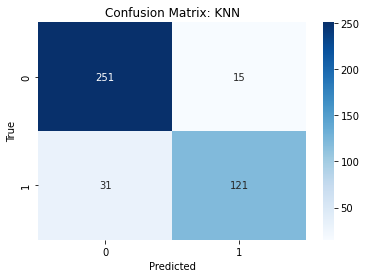

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
Y_pred = model_knn.predict(X_test_clear)

summary_eval = classification_report(Y_test,Y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_knn.named_steps['classifier'].classes_,
            yticklabels=model_knn.named_steps['classifier'].classes_)
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

# save with submition file
new_submission = pd.read_csv('gender_submission.csv')
new_submission['Survived'] = Y_pred

# Save the DataFrame to a CSV file
new_submission.to_csv('knn.csv', index=False)

In [13]:
from sklearn.linear_model import LogisticRegression

# Define the pipeline KNN
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', LogisticRegression())  # You can replace this with any other classifier
])

# Define the parameter grid to search
param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'classifier__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver algorithm
    'classifier__max_iter': [100, 1000, 10000],        # Maximum number of iterations
}

# ‘liblinear’, ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
# ‘liblinear’ and ‘saga’ also handle L1 penalty
# Reference by https://stackoverflow.com/questions/60868629/valueerror-solver-lbfgs-supports-only-l2-or-none-penalties-got-l1-penalty

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train_clear, np.ravel(Y_train))

# Access the best parameters and best estimator
best_params_log = grid_search.best_params_
# best_estimator_log = grid_search.best_estimator_

# Now you can use the best estimator for predictions
print(best_params_log)
# print(best_estimator)

{'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


c:\Users\Window10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Window10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Window10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Window10\AppData\Local\Programs\Python\Py

In [14]:
# Define the pipeline logistic regression
model_log = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', LogisticRegression(max_iter=best_params_log['classifier__max_iter'], C=best_params_log['classifier__C'], penalty=best_params_log['classifier__penalty'], solver=best_params_log['classifier__solver']))  # You can replace this with any other classifier
])

# Fit the pipeline
model_log.fit(X_train_clear,np.ravel(Y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.01))])

              precision    recall  f1-score   support

           0     0.9451    0.9699    0.9573       266
           1     0.9448    0.9013    0.9226       152

    accuracy                         0.9450       418
   macro avg     0.9449    0.9356    0.9399       418
weighted avg     0.9450    0.9450    0.9447       418



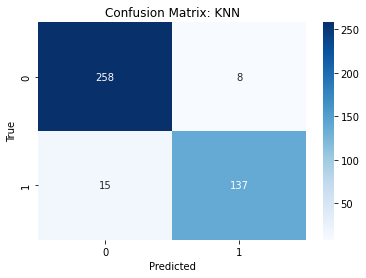

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
Y_pred = model_log.predict(X_test_clear)

summary_eval = classification_report(Y_test,Y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_log.named_steps['classifier'].classes_,
            yticklabels=model_log.named_steps['classifier'].classes_)
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_log.png')

plt.show()

# save with submition file
new_submission = pd.read_csv('gender_submission.csv')
new_submission['Survived'] = Y_pred

# Save the DataFrame to a CSV file
new_submission.to_csv('logisticRegression.csv', index=False)

In [16]:
# Define the pipeline support vertor machine
from sklearn.svm import SVC

# Define the pipeline KNN
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', SVC())  # You can replace this with any other classifier
])

# Define a parameter grid to search through
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],          # Regularization parameter
    'classifier__kernel': ['rbf', 'sigmoid'],    # Kernel type
    'classifier__gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6))  # Kernel coefficient for 'rbf' and 'sigmold'
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train_clear, np.ravel(Y_train))

# Access the best parameters and best estimator
best_params_svm = grid_search.best_params_
# best_estimator_log = grid_search.best_estimator_

# Now you can use the best estimator for predictions
print(best_params_svm)
# print(best_estimator)

{'classifier__C': 1, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


In [17]:
# Define the pipeline logistic regression
model_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Normalization step
    ('classifier', SVC(kernel=best_params_svm['classifier__kernel'], C=best_params_svm['classifier__C'], gamma=best_params_svm['classifier__gamma']))  # You can replace this with any other classifier
])

# Fit the pipeline
model_svm.fit(X_train_clear,np.ravel(Y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1, gamma=0.1))])

              precision    recall  f1-score   support

           0     0.9590    0.9662    0.9625       266
           1     0.9400    0.9276    0.9338       152

    accuracy                         0.9522       418
   macro avg     0.9495    0.9469    0.9482       418
weighted avg     0.9521    0.9522    0.9521       418



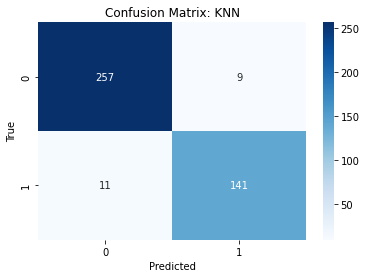

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
Y_pred = model_svm.predict(X_test_clear)

summary_eval = classification_report(Y_test,Y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_svm.named_steps['classifier'].classes_,
            yticklabels=model_svm.named_steps['classifier'].classes_)
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_svm.png')

plt.show()
# save with submition file
new_submission = pd.read_csv('gender_submission.csv')
new_submission['Survived'] = Y_pred

# Save the DataFrame to a CSV file
new_submission.to_csv('svm.csv', index=False)

In [19]:
# save model
import joblib as jb
jb.dump(model_svm,"svm.pkl")

['svm.pkl']

In [12]:
# load pipeline
import joblib as jb
model_svm = jb.load("svm.pkl")

# Fit the pipeline
model_svm.fit(X_train_clear,np.ravel(Y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=1, gamma=0.1))])

In [20]:
# save csv to pickle file
df_train.to_pickle("train.pkl")
df_test.to_pickle("test.pkl")

df_train = pd.read_pickle("train.pkl")
df_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'to_pickle'